1. Collect Data & Make one file

In [ ]:
path_of_sales_data = '/content/drive/MyDrive/Colab Notebooks/SalesData12Months'

In [ ]:
import os
file_names = os.listdir(path_of_sales_data)

In [ ]:
print(file_names)

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_November_2019.csv', 'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv']


In [ ]:
path_of_sales_data+'/'+file_names[1]

'/content/drive/MyDrive/Colab Notebooks/SalesData12Months/Sales_April_2019.csv'

In [ ]:
import pandas as pd
year_sales = pd.DataFrame()

In [ ]:
print(year_sales)

Empty DataFrame
Columns: []
Index: []


In [ ]:
for file in file_names:
  temp = pd.read_csv(path_of_sales_data+'/'+file)
  year_sales = pd.concat([year_sales,temp])

In [ ]:
print(year_sales.shape)

(186850, 6)


In [ ]:
year_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


**DATA CLEANING**

1. Drop rows if all data is NULL

In [ ]:
year_sales = year_sales.dropna(how ='all')

In [ ]:
year_sales.shape

(186305, 6)

In [ ]:
year_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
#year_sales['amt'] = year_sales['Quantity Ordered'] * year_sales['Price Each']

In [ ]:
year_sales['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
      dtype=object)

In [ ]:
year_sales.loc[year_sales['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
14291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15419,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15963,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16234,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
year_sales = year_sales.loc[year_sales['Quantity Ordered'] !='Quantity Ordered']

In [ ]:
year_sales['Quantity Ordered'] = year_sales['Quantity Ordered'].astype(int)

In [ ]:
year_sales.dtypes

Order ID            object
Product             object
Quantity Ordered     int64
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
year_sales['Price Each'] = year_sales['Price Each'].astype(float)

In [ ]:
year_sales['amt'] = year_sales['Quantity Ordered'] * year_sales['Price Each']

In [ ]:
year_sales['amt']

0        1700.00
1         600.00
2          11.95
3         149.99
4          11.95
          ...   
16630      99.99
16631      11.99
16632       5.98
16633      11.95
16634     999.99
Name: amt, Length: 185950, dtype: float64

Which Month has highest Sales and lowest sales using data

In [ ]:

year_sales['Month'] = year_sales['Order Date'].str[0:2].astype('int8')

In [ ]:
year_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,amt,Month
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",99.99,5
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",11.99,5
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",5.98,5
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",11.95,5
16634,209920,ThinkPad Laptop,1,999.99,05/18/19 23:07,"43 5th St, Atlanta, GA 30301",999.99,5


In [ ]:
year_sales.groupby('Month').sum()['amt']

<ipython-input-23-603064fd505c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales.groupby('Month').sum()['amt']


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: amt, dtype: float64

<ipython-input-24-de10c2a24194>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(range(1,13),year_sales.groupby('Month').sum()['amt'])


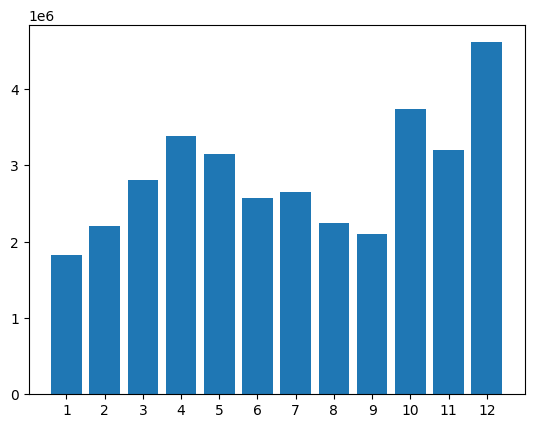

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(1,13),year_sales.groupby('Month').sum()['amt'])
plt.xticks(range(1,13))
plt.show()

In [ ]:
dec_sales = year_sales.loc[year_sales['Month'] == 12]

In [ ]:
dec_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,amt,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12


In [ ]:
dec_sales['Date'] = dec_sales['Order Date'].str[3:5].astype('int8')

<ipython-input-27-76df7c803a7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_sales['Date'] = dec_sales['Order Date'].str[3:5].astype('int8')


In [ ]:
dec_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,amt,Month,Date
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,30
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,29
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,22
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,18


In [ ]:
dec_sales.groupby('Date').sum()['amt']

<ipython-input-29-f7904ad948da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dec_sales.groupby('Date').sum()['amt']


Date
1     148153.63
2     149025.71
3     142570.45
4     166727.69
5     155079.30
6     151910.47
7     139645.75
8     143527.63
9     147135.13
10    162832.74
11    146367.03
12    144195.15
13    153332.14
14    141991.78
15    143269.72
16    162970.61
17    157364.72
18    154598.77
19    137732.67
20    160181.30
21    154756.87
22    147348.09
23    152214.45
24    152888.82
25    152268.42
26    144912.02
27    126628.05
28    134015.50
29    156024.62
30    152319.81
31    131454.30
Name: amt, dtype: float64

<ipython-input-30-114fded41e44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(range(1,32),dec_sales.groupby('Date').sum()['amt'])


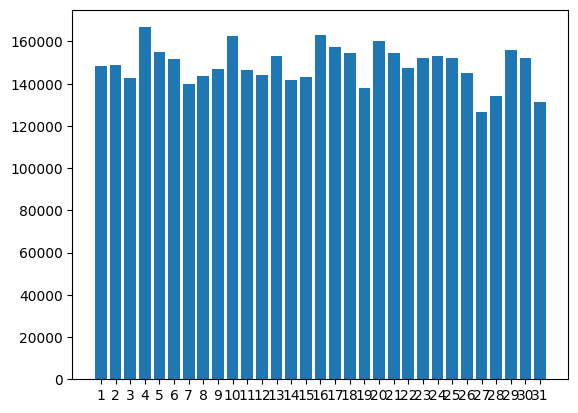

In [ ]:
plt.bar(range(1,32),dec_sales.groupby('Date').sum()['amt'])
plt.xticks(range(1,32))
plt.show()

Which city has highest sales ?

In [ ]:
def get_city(pur_add):
  return pur_add.split(',')[1][1:]

year_sales['city'] = year_sales['Purchase Address'].apply(get_city)

In [ ]:
year_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,amt,Month,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta


In [ ]:
year_sales.groupby('city').sum()['amt']

<ipython-input-33-9f5c6ef63624>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales.groupby('city').sum()['amt']


city
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: amt, dtype: float64

In [ ]:
year_sales.loc[year_sales['city'] == 'Dallas']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,amt,Month,city
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",23.90,12,Dallas
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",99.99,12,Dallas
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",11.96,12,Dallas
13,295678,AAA Batteries (4-pack),2,2.99,12/06/19 09:38,"187 Lincoln St, Dallas, TX 75001",5.98,12,Dallas
14,295679,USB-C Charging Cable,1,11.95,12/25/19 09:39,"902 2nd St, Dallas, TX 75001",11.95,12,Dallas
...,...,...,...,...,...,...,...,...,...
16553,209842,Bose SoundSport Headphones,1,99.99,05/29/19 22:52,"190 14th St, Dallas, TX 75001",99.99,5,Dallas
16574,209861,AA Batteries (4-pack),1,3.84,05/15/19 10:43,"335 Spruce St, Dallas, TX 75001",3.84,5,Dallas
16588,209875,Wired Headphones,1,11.99,05/08/19 22:57,"526 12th St, Dallas, TX 75001",11.99,5,Dallas
16605,209892,Wired Headphones,1,11.99,05/17/19 08:37,"40 Ridge St, Dallas, TX 75001",11.99,5,Dallas


In [ ]:
cities =year_sales['city'].unique()
cities.sort()

In [ ]:
cities

array(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles',
       'New York City', 'Portland', 'San Francisco', 'Seattle'],
      dtype=object)

<ipython-input-37-f110ad6c38f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(cities,year_sales.groupby('city').sum()['amt'])


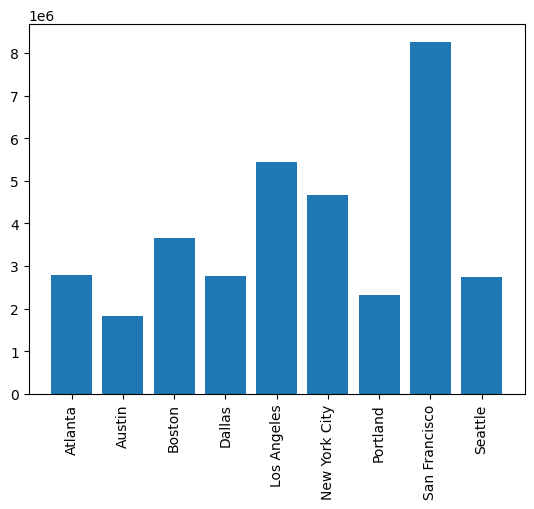

In [ ]:
plt.bar(cities,year_sales.groupby('city').sum()['amt'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
year_sales['Hour']= year_sales['Order Date'].str[9:11].astype('int8')

In [ ]:
year_sales.groupby('Hour').sum()['amt']

<ipython-input-39-abde316887ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales.groupby('Hour').sum()['amt']


Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: amt, dtype: float64

<ipython-input-40-b20d3d5d44c1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(range(0,24),year_sales.groupby('Hour').sum()['amt'])


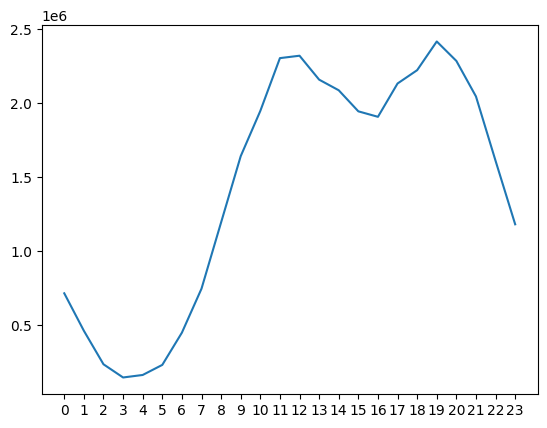

In [ ]:
plt.plot(range(0,24),year_sales.groupby('Hour').sum()['amt'])
plt.xticks(range(0,24))
plt.show()

In [ ]:
year_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,amt,Month,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta,12


In [ ]:
year_sales.groupby('Product').sum()['amt']

<ipython-input-42-5729e5924c45>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales.groupby('Product').sum()['amt']


Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: amt, dtype: float64

In [ ]:
year_sales.groupby('Product').sum()['Quantity Ordered']

<ipython-input-43-5c7f013d4edd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales.groupby('Product').sum()['Quantity Ordered']


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [ ]:
prod = year_sales['Product'].unique()
prod.sort()

In [ ]:
prod

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

<ipython-input-46-cd09acefc0b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(prod,year_sales.groupby('Product').sum()['amt'])


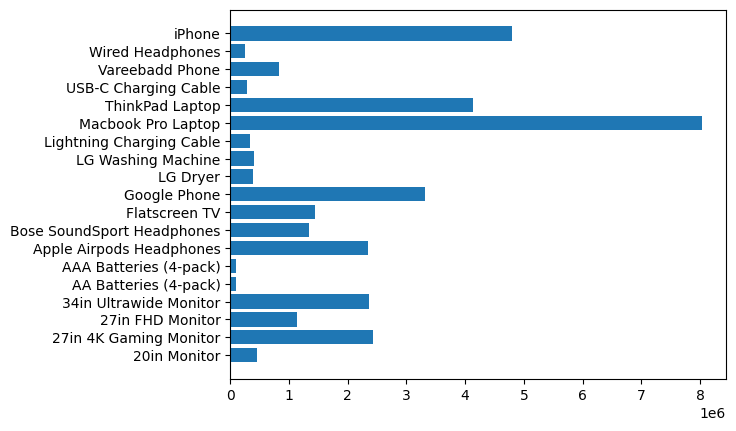

In [ ]:
plt.barh(prod,year_sales.groupby('Product').sum()['amt'])
#plt.xticks(range(0,24))
plt.show()

<ipython-input-47-f9050ad0f239>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(prod,year_sales.groupby('Product').sum()['Quantity Ordered'])


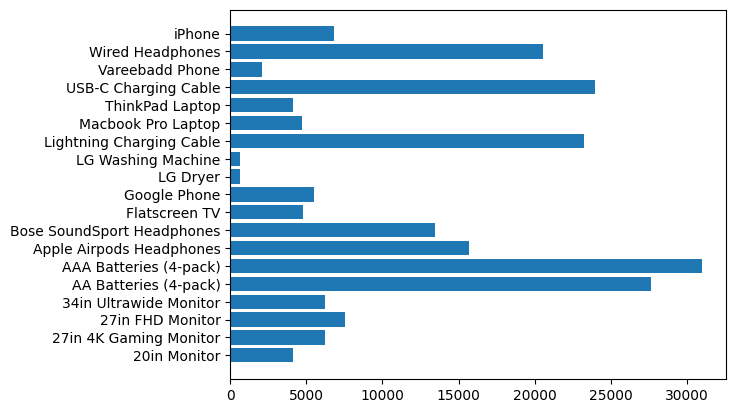

In [ ]:
plt.barh(prod,year_sales.groupby('Product').sum()['Quantity Ordered'])
#plt.xticks(range(0,24))
plt.show()